# Compare texts with Glasshome values


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
df_texts_glasshome = pd.read_csv('values_glasshome.csv')
df_texts = pd.read_csv('values_scraped_comments_thephilosophyforum.csv')

In [3]:
# add as extra row the glasshome values
df = pd.concat([df_texts, df_texts_glasshome], ignore_index=True)

# add user_id when is Nan
df['user_id'] = df.apply(lambda row: 'glasshome' if pd.isna(row['user_id']) else row['user_id'], axis=1)
df

,user_id,author,value_text,category
0,1.0,BC,obedient ... reverent ... capitalism—T ClarkAn...,NaN
1,2.0,I like sushi,The basic principle of anarchism seems to be a...,NaN
2,3.0,Janus,I have a feeling these are too simplistic and ...,NaN
3,4.0,Joshs,↪T ClarkYou missed something here. You left ou...,NaN
4,5.0,Judaka,↪T ClarkYou take anything and express all the ...,NaN
5,6.0,Possibility,"Personally I see nationalism, patriotism and l...",NaN
6,7.0,RegularGuy,↪T ClarkI value different things in different ...,NaN
7,8.0,S,↪T ClarkDiogenes and Nietzsche were good on va...,NaN
8,9.0,Shawn,"I understand the importance of values; but, ho...",NaN
9,10.0,T Clark,"In the last week or so, in several different c...",NaN


## Analysis

### TF-IDF

Values texts 1:


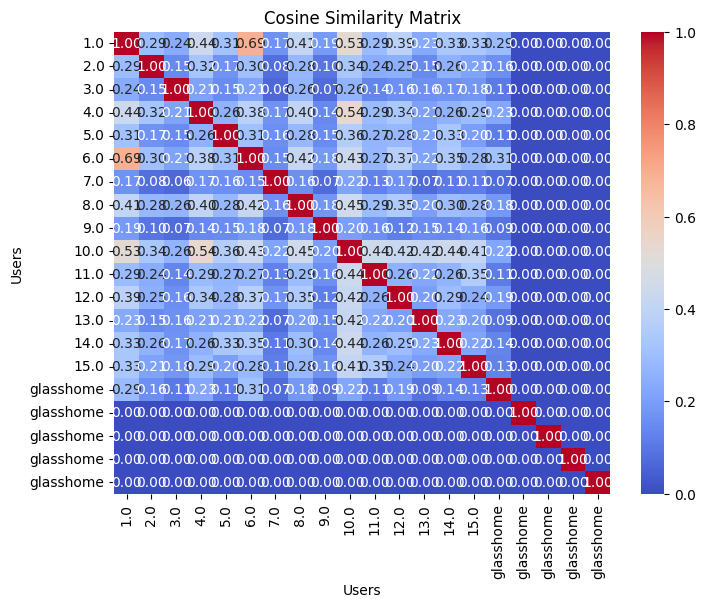

In [4]:
# TF-idf
from aux_methods import vectorize_text_tfidf, plot_similarity_matrix

# Test the similarity matrix plotting
print("Values texts 1:")
sim_matrix, similarities = vectorize_text_tfidf(df)
user_ids = df['user_id'].tolist()
plot_similarity_matrix(similarities, user_ids)

### BART

In [5]:
# BART MNLI zero-shot classification
from transformers import pipeline

# Load zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
labels = ["security", "power", "achievement", "hedonism", "stimulation", "self-direction", "universalism", "benevolence", "tradition", "conformity"]

Device set to use cpu


In [6]:
# Run classification for all texts
texts = df['value_text'].tolist()
scores = np.zeros((len(texts), len(labels)))
for i, text in enumerate(texts):
    result = classifier(text, candidate_labels=labels)
    scores[i] = result['scores']

from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity
cosine_sim = cosine_similarity(scores)

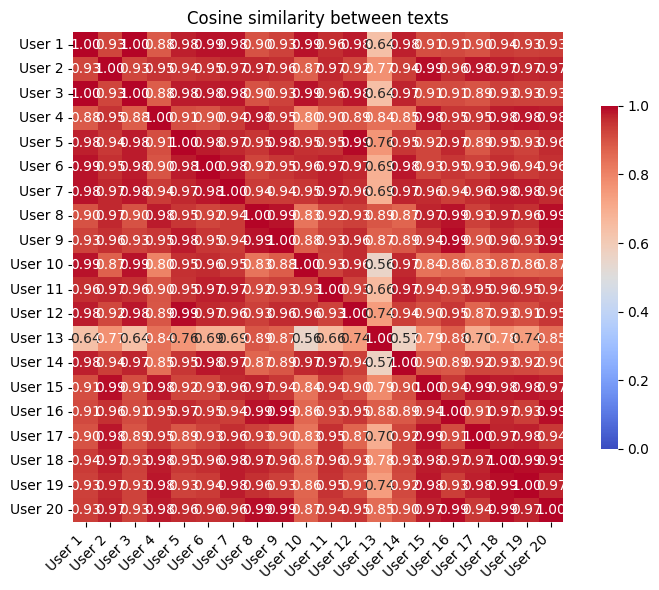

In [7]:
# Friendly row/col labels
n = cosine_sim.shape[0]
labels = [f'User {i+1}' for i in range(n)]

# Simple heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cosine_sim, xticklabels=labels, yticklabels=labels, annot=True, fmt=".2f",
            cmap="coolwarm", vmin=0, vmax=1, square=True, cbar_kws={"shrink":0.7})
plt.title("Cosine similarity between texts")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### ME2-BERT 